                                 Brain Tumor Classification Using Convolutional Neural Network

In [1]:
# Importing the Libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Rescaling, Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Loading the Dataset
train = r"D:\Datasets\Image Datasets\brain_tumor_MRI\Training"
val = r"D:\Datasets\Image Datasets\brain_tumor_MRI\Validating"
test = r"D:\Datasets\Image Datasets\brain_tumor_MRI\Testing"

In [3]:
image_height = 180
image_width = 180
batch_size = 32

In [4]:
# Scaling the Training Data
data_train = tf.keras.utils.image_dataset_from_directory(
    train,
    shuffle = True,
    image_size = (image_width, image_height),
    batch_size = batch_size,
    validation_split = False)

Found 5712 files belonging to 4 classes.


In [5]:
data_train

<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [6]:
data_categories = data_train.class_names
data_categories

['glioma', 'meningioma', 'notumor', 'pituitary']

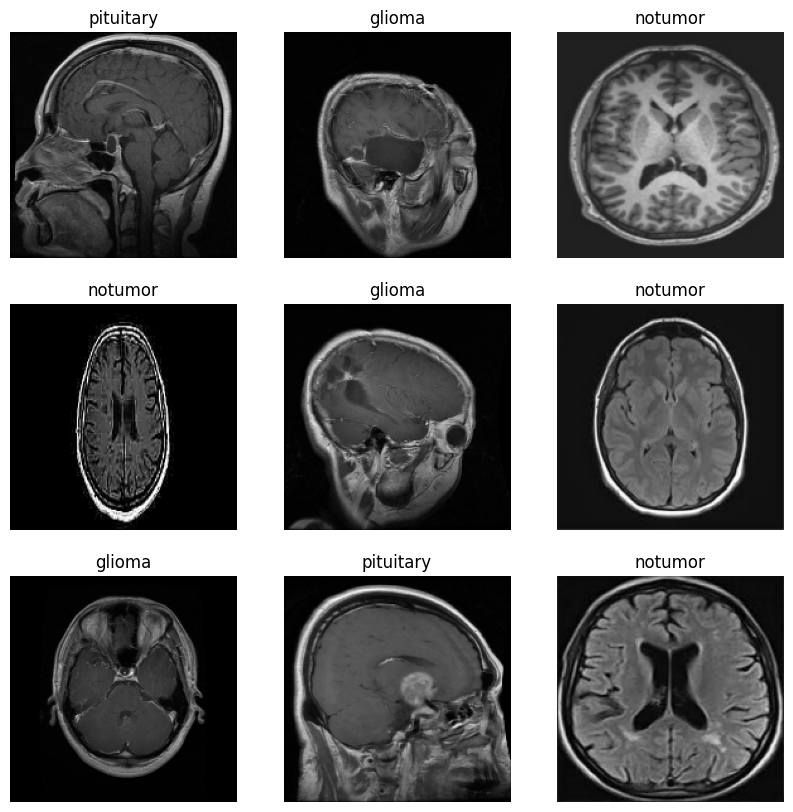

In [7]:
plt.figure(figsize=(10, 10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_categories[labels[i]])
        plt.axis("off")

In [8]:
# Scaling the Validation Data
data_val = tf.keras.utils.image_dataset_from_directory(
    val,
    image_size = (image_width, image_height),
    shuffle = False,
    batch_size = batch_size,
    validation_split = False)

Found 650 files belonging to 4 classes.


In [9]:
# Scaling the Test Data
data_test = tf.keras.utils.image_dataset_from_directory(
    test,
    image_size = (image_width, image_height),
    shuffle = False,
    batch_size = batch_size,
    validation_split = False)

Found 661 files belonging to 4 classes.


In [10]:
data_test

<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

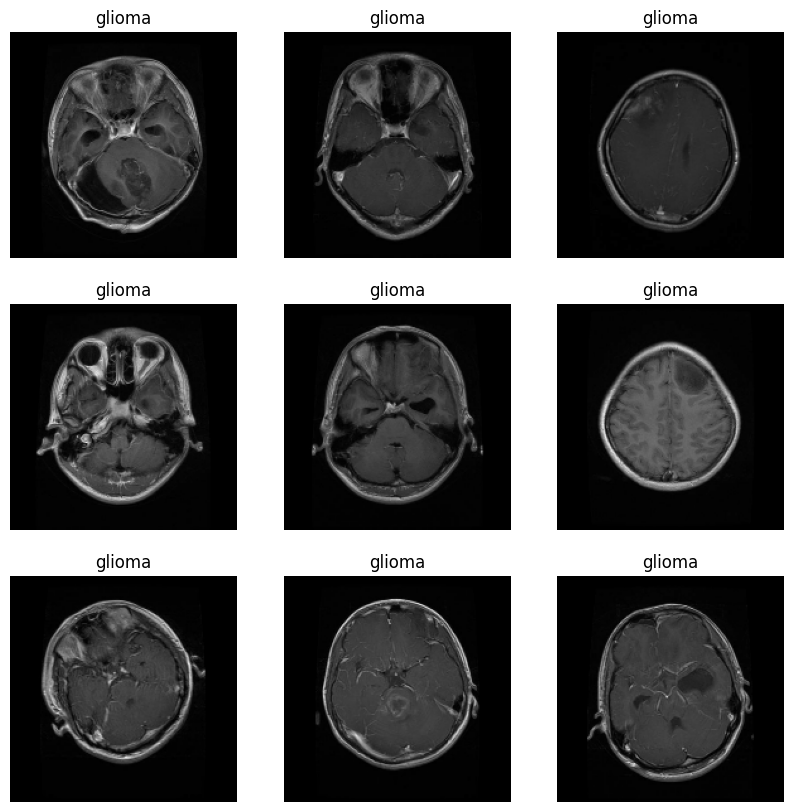

In [11]:
plt.figure(figsize=(10, 10))
for image, labels in data_test.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(image[i].numpy().astype("uint"))
        plt.title(data_categories[labels[i]])
        plt.axis("off")

In [12]:
# Building the CNN Model Architecture
model = Sequential()

model.add(Conv2D(16, kernel_size = (3, 3), activation = "relu", input_shape = (image_width, image_height, 3), padding = "same"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, kernel_size = (3, 3), activation = "relu", padding = "same"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = "relu", padding = "same"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(len(data_categories), activation = "softmax"))

model.compile(optimizer = Adam(0.001), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 22, 22, 64)        0

In [13]:
# Training the model
history = model.fit(data_train,
                     validation_data = data_val,
                     epochs = 20,
                     batch_size = 50,
                     verbose = 1)

Epoch 1/20
179/179 [==============================] - 147s 810ms/step - loss: 5.1529 - accuracy: 0.7591 - val_loss: 0.4687 - val_accuracy: 0.8662
Epoch 2/20
179/179 [==============================] - 117s 651ms/step - loss: 0.2435 - accuracy: 0.9177 - val_loss: 0.3576 - val_accuracy: 0.9031
Epoch 3/20
179/179 [==============================] - 114s 637ms/step - loss: 0.1413 - accuracy: 0.9517 - val_loss: 0.4763 - val_accuracy: 0.9031
Epoch 4/20
179/179 [==============================] - 119s 665ms/step - loss: 0.0887 - accuracy: 0.9694 - val_loss: 0.1907 - val_accuracy: 0.9692
Epoch 5/20
179/179 [==============================] - 111s 617ms/step - loss: 0.0659 - accuracy: 0.9800 - val_loss: 0.3044 - val_accuracy: 0.9354
Epoch 6/20
179/179 [==============================] - 111s 619ms/step - loss: 0.0507 - accuracy: 0.9842 - val_loss: 0.2382 - val_accuracy: 0.9585
Epoch 7/20
179/179 [==============================] - 120s 671ms/step - loss: 0.0405 - accuracy: 0.9897 - val_loss: 0.2890 -

In [14]:
# Evaluating the model with Test Data
model.evaluate(data_test)

21/21 [==============================] - 6s 261ms/step - loss: 0.3608 - accuracy: 0.9198


[0.36082199215888977, 0.9198184609413147]

In [18]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(accuracy))

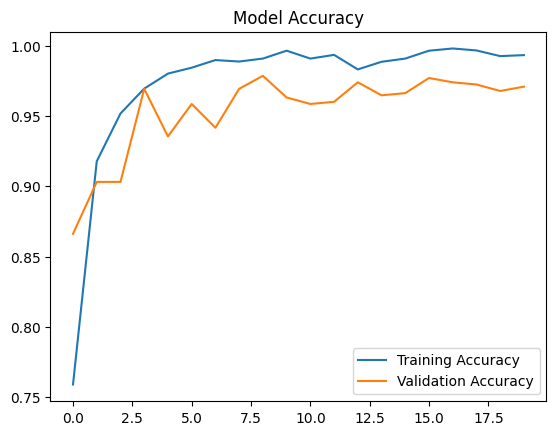

<Figure size 640x480 with 0 Axes>

In [19]:
# Comparing the Training and Validation Accuracy 
plt.plot(epochs, accuracy, label = "Training Accuracy")
plt.plot(epochs, val_accuracy, label = "Validation Accuracy")

plt.title("Model Accuracy")
plt.legend(loc = "lower right")
plt.figure()
plt.show()

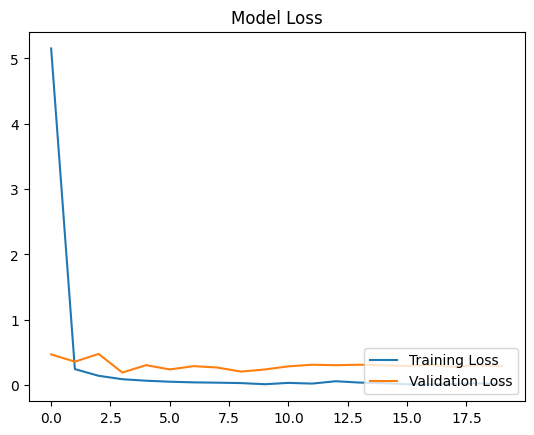

<Figure size 640x480 with 0 Axes>

In [20]:
#Comparing the Training and Validation Loss
plt.plot(epochs, loss, label = "Training Loss")
plt.plot(epochs, val_loss, label = "Validation Loss")

plt.title("Model Loss")
plt.legend(loc = "lower right")
plt.figure()
plt.show()

In [40]:
image = "glioma.jpg"
image = tf.keras.utils.load_img(image, target_size=(image_height, image_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr, 0)

In [41]:
prediction = model.predict(img_bat)

1/1 [==============================] - 0s 62ms/step


In [47]:
score = tf.nn.softmax(prediction)

print("Brain Tumor in image is {} with accuracy {:0.2}".format(data_categories[np.argmax(score)], np.max(score)))

Brain Tumor in image is glioma with accuracy 0.48


In [49]:
model.save("Brain_Tumor_Classifier.keras")